##内容索引
1. 利萨如曲线 --- 使用标准三角函数绘制
2. 绘制方波 --- 利用无穷傅里叶级数表示
3. 绘制锯齿波和三角波

In [21]:
%matplotlib inline
import numpy as np
from matplotlib.pyplot import plot
from matplotlib.pyplot import show
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

##1. 利萨如曲线
在NumPy中，所有标准三角函数如sin、cos、tan等均有对应的通用函数。利萨如曲线(Lissajous curve)是一种很有趣的使用三角函数的方式。

利萨如曲线由如下参数方程定义：
- x = A sin(at + π/2)
- y = B sin(bt)

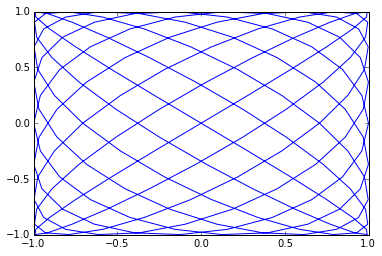

In [5]:
# 为简单起见，令A和B为1
t = np.linspace(-np.pi, np.pi, 201)
a = 9
b = 8

x = np.sin(a*t + np.pi/2)
y = np.sin(b*t)

plot(x, y)
show()

In [19]:
def lissajous(a, b):
    t = np.linspace(-np.pi, np.pi, 201)
    x = np.sin(a*t + np.pi/2)
    y = np.sin(b*t)
    return x, y

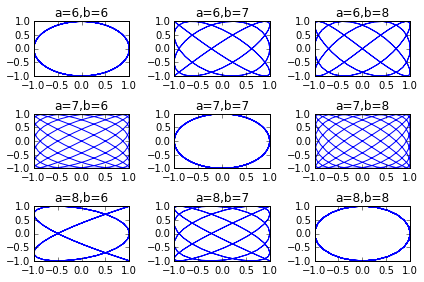

In [46]:
# matplotlib.gridspec.GridSpecBase
# 指定figure中subplot的位置
gs = gridspec.GridSpec(3,3)
fig = plt.figure()
ax = []

for a in xrange(3):
    for b in xrange(3):
        ax.append(fig.add_subplot(gs[a,b]))
        a1 = a + 6
        b1 = b + 6
        x, y = lissajous(a1, b1)
        ax[-1].set_title('a=%d,b=%d' % (a1,b1))
        ax[-1].plot(x, y)

# 使得子图适应figure的间距
fig.tight_layout()
show()

##2. 绘制方波
方波可以近似表示为多个正弦波的叠加。事实上，任意一个方波信号都可以用无穷傅里叶级数表示。

In [50]:
Latex(r"$\sum_{k=1}^\infty\frac{4\sin((2k-1)t)}{(2k-1)\pi}$")

<IPython.core.display.Latex object>

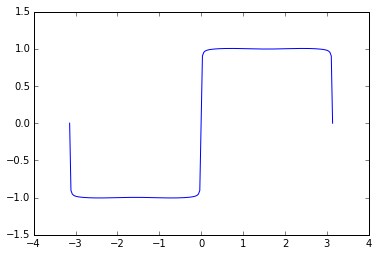

In [49]:
t = np.linspace(-np.pi, np.pi, 201)
k = np.arange(1,99)
k = 2*k - 1
f = np.zeros_like(t)

for i  in range(len(t)):
    f[i] = np.sum(np.sin(k * t[i])/k)
f = (4/np.pi) * f

plot(t, f)
show()

##锯齿波和三角波
锯齿波和三角波也是常见的波形。和方波类似，我们也可以将它们表示成无穷傅里叶级数。对锯齿波取绝对值即可得到三角波。

In [52]:
# 锯齿波的无穷级数表达式
Latex(r"$\sum_{k=1}^\infty\frac{-2\sin(2\pi kt)}{k\pi}$")

<IPython.core.display.Latex object>

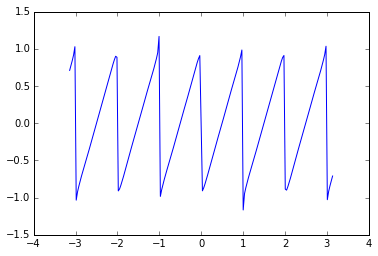

In [53]:
t = np.linspace(-np.pi, np.pi, 201)
k = np.arange(1,99)
f = np.zeros_like(t)

for i  in range(len(t)):
    f[i] = np.sum(np.sin(2*np.pi*k * t[i])/k)
f = (-2/np.pi) * f

plot(t, f)
show()

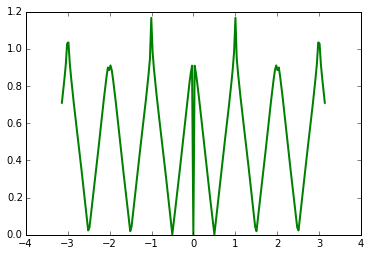

In [57]:
plot(t, np.abs(f),c='g',lw=2.0)
show()